1. Compare plot (done)
2. Normalise    (done)
3. Scale 0 bias to represent a rate 
4. Plot Z peak (done?)
5. Read paper

To be able to manipulate root files using python we can import uproot 

In [2]:
import uproot
import numpy as np #math and science package
import scipy as sp #math and science package
import awkward as ak #root files are usuallt awkward arrays 
import matplotlib.pyplot as plt #plot stuff7
from my_functions import histogram
from my_functions import histogram2

In [3]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

file.keys() #Here we can see the keys of the file (index)

['MuonTree_Zmumu;1', 'MuonTree_ZeroBias;1']

In [ ]:
tree=file["MuonTree_ZeroBias;1"] #here we assign one of the keys to a variable 
tree.show() #by saying .show we display the list below, where we can see the datasets contained by "tree"

eta = tree["LVL1Muon_eta"].array()
eta=ak.to_numpy(ak.flatten(eta)) #these two steps seems to be necessary to get a nice array of data that we can plot



name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
muon_pt              | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_eta             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_phi             | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_e               | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_type            | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_charge          | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
muon_author          | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_quality         | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
muon_passedIDCuts    | std::vector<bool>        | AsJagged(AsDtype('bool'), h...
jTower_et            | std::vector<float>       | AsJagged(AsDtype('>f4'), he...
jTower_et_MeV        | std::

##### "Eta ($\eta$)" is a variable called Pseudorapidity and it represents a location of the ATLAS detector. 
$\eta$=0 means the particle went up with respect to the collision point and direction of movement, if $\eta$ is big, around 4 or more, then the direction of the produced muon has barely changed with respect to the collision

Wikipedia: https://en.wikipedia.org/wiki/Pseudorapidity

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pseudorapidity_plot.svg/800px-Pseudorapidity_plot.svg.png width=300>
<img src=https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.bnl.gov%2Ftoday%2Fbody_pics%2F2015%2F06%2Fevent_display_run266904-hr.jpg&f=1&nofb=1&ipt=5efb974c4347d361ea100f791f9edc609db7ba627c2d357422afb41f7060f024 width=400>

In [5]:
print(eta) #see the values
type(eta) #see the type

[-0.92943877 -0.3593036   0.2983717  ... -1.9235172   1.8997809
 -0.46613458]


numpy.ndarray

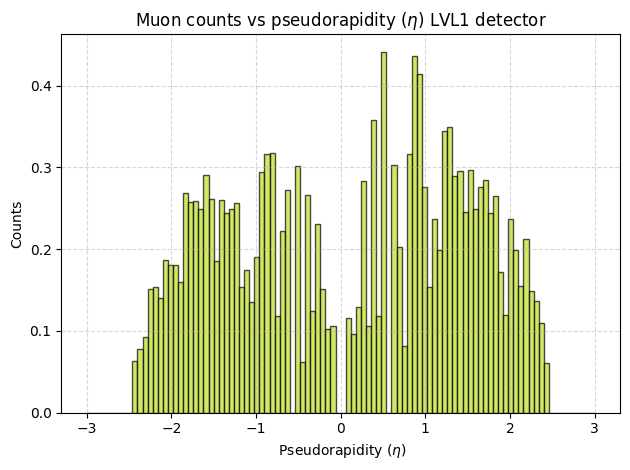

In [6]:
from my_functions import histogram
data=eta
nbins=100
x_range=[-3,3]
x_label=r" Pseudorapidity ($\eta$)"
y_label="Counts"
title_label=r"Muon counts vs pseudorapidity ($\eta$) LVL1 detector"
histogram(data, nbins, x_range,  x_label, y_label, title_label)

#### Now let's try to extract different information: how many muons are produced in every event (collision)? We aim to create a histogram that relates number of muons per collision in x-axis and counts in y-axis. Let's use for example muon_eta.

See results:

    1. Function plot_number_mu_per_event
    2. File Number_muons_per_event

#### Moreover, I'm going to write a function that compares the background and Z mumu data.

See results:

    1. Function plot_number_mu_per_event2
    2. File Number_muons_per_event

#### Improvement of plots
The goal now is to keep improving the histogram function: let's add the capacity to normalise the plot and also to compare the Z->mu mu data and the background (unbiased) data by plotting them together. 

See file my_function to see the improved function (histogram2) and Zmumu_vs_0bias_plots to see the plots

#### Next goal is to reconstruct the Z boson peak from the data. The idea is that from eta, phi and p_T of the muons we should be able to calculate the invariant mass of the Z boson, which should be arround 90 GeV/c

#### https://en.wikipedia.org/wiki/Invariant_mas
#### https://cds.cern.ch/record/2909648/files/main.pdf

##### See the file Z_mass_reconstruction.ipyb



Offline muons: what are they

#### Next steps:
1. Add errorbars to plots
2. Use only high quaity muons
3. Use also 3,4,5... muon events for the Z boson peak: only 2 are real, so the idea is to find out which 2 muons are the good ones (using charge conservation and maybe choosing the best fit between all of them)

Firs I'm going to create a function to use only high quality muons (0 quality). The idea is to select 0 quality muons and then recycle the functions that I already have.